## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_20-26-03-23.csv', firstRow=210, lastRow=216)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_240323_S211-216.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=64s and ended at t=470s; mass=43.61970000000001g
This equals a volume of 43.707m; expected was 44.198mL; error is 1.11%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.002 g/s and for 2nd derivative = 0.0008125000000000001 g/s^2


<IPython.core.display.Javascript object>


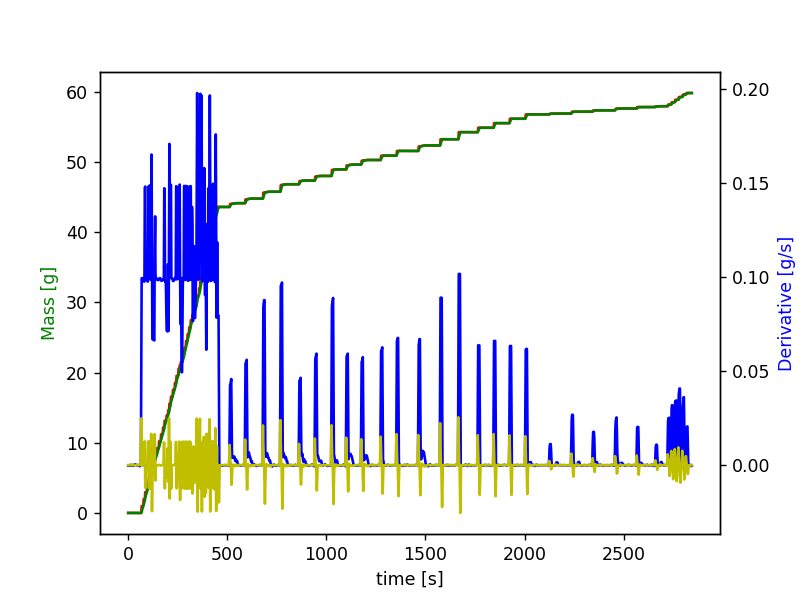

Addition of 0.54g Plantacare 818 detected from 508s to 554s - expected volume = 0.585mL and actual volume = 0.497mL (resulting error is 15.192%)
Addition of 0.657g Plantacare 818 detected from 586s to 628s - expected volume = 0.585mL and actual volume = 0.604mL (resulting error is 3.236%)
Addition of 0.984g Plantacare 818 detected from 676s to 720s - expected volume = 0.919mL and actual volume = 0.908mL (resulting error is 1.175%)
Addition of 1.065g Plantacare 818 detected from 764s to 806s - expected volume = 0.991mL and actual volume = 0.985mL (resulting error is 0.653%)
Addition of 0.539g Plantacare 2000 detected from 858s to 898s - expected volume = 0.572mL and actual volume = 0.491mL (resulting error is 14.088%)
Addition of 0.653g Plantacare 2000 detected from 938s to 978s - expected volume = 0.572mL and actual volume = 0.596mL (resulting error is 4.127%)
Addition of 0.931g Plantacare 2000 detected from 1022s to 1058s - expected volume = 0.876mL and actual volume = 0.86mL (resulti

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0028125000000000003 g/s and for 2nd derivative = 0.0011718750000000002 g/s^2


<IPython.core.display.Javascript object>


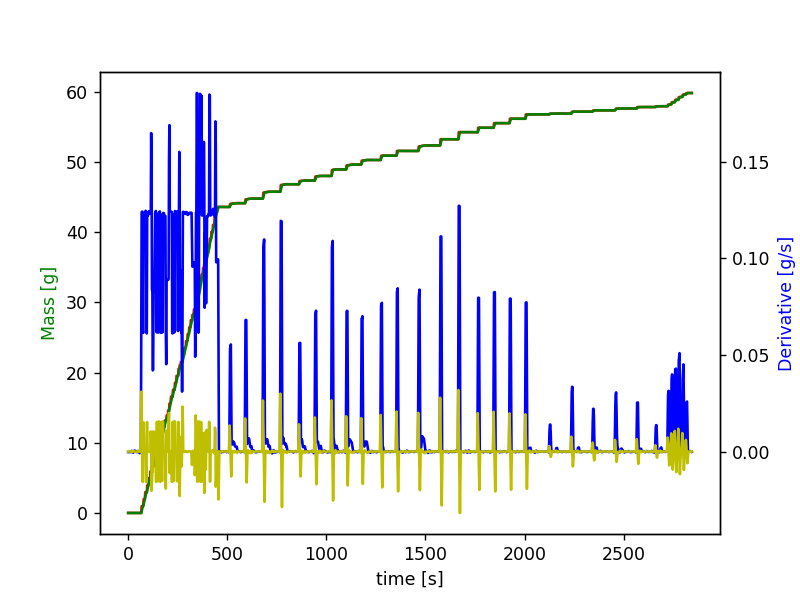

Addition of 0.109g Luviquat Excellence detected from 2122s to 2138s - expected volume = 0.13mL and actual volume = 0.099mL (resulting error is 23.776%)
Addition of 0.265g Luviquat Excellence detected from 2232s to 2250s - expected volume = 0.259mL and actual volume = 0.241mL (resulting error is 6.93%)
Addition of 0.176g Luviquat Excellence detected from 2340s to 2358s - expected volume = 0.169mL and actual volume = 0.158mL (resulting error is 6.582%)
Addition of 0.26g Luviquat Excellence detected from 2452s to 2472s - expected volume = 0.244mL and actual volume = 0.237mL (resulting error is 3.125%)
Addition of 0.199g Luviquat Excellence detected from 2562s to 2580s - expected volume = 0.187mL and actual volume = 0.178mL (resulting error is 5.06%)
Addition of 0.104g Luviquat Excellence detected from 2656s to 2674s - expected volume = 0.096mL and actual volume = 0.095mL (resulting error is 0.833%)


In [9]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.00625 g/s and for 2nd derivative = 0.0021875 g/s^2


<IPython.core.display.Javascript object>


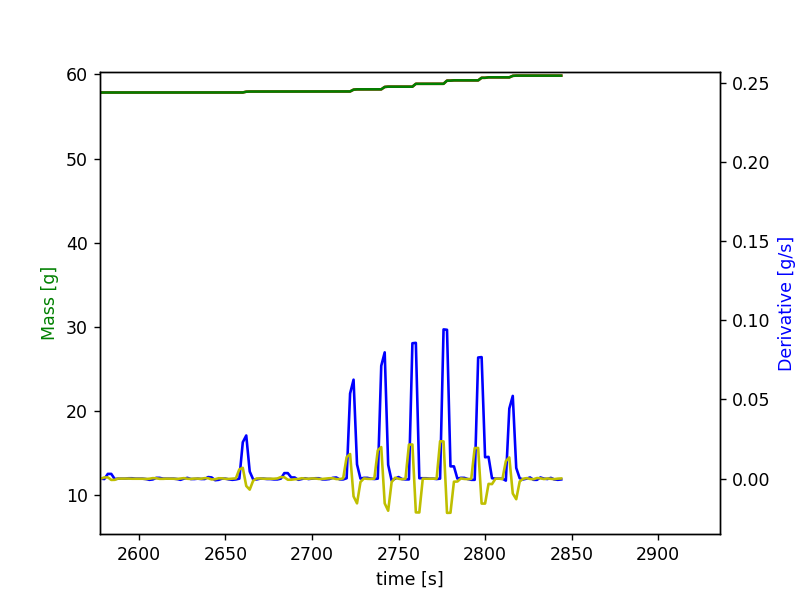

Addition of 0.25g Arlypon TT detected from 2718s to 2730s - expected volume = 0.301mL and actual volume = 0.262mL (resulting error is 13.194%)
Addition of 0.316g Arlypon TT detected from 2736s to 2748s - expected volume = 0.304mL and actual volume = 0.331mL (resulting error is 9.138%)
Addition of 0.342g Arlypon TT detected from 2754s to 2766s - expected volume = 0.322mL and actual volume = 0.354mL (resulting error is 9.807%)
Addition of 0.408g Arlypon TT detected from 2772s to 2786s - expected volume = 0.404mL and actual volume = 0.428mL (resulting error is 5.974%)
Addition of 0.358g Arlypon TT detected from 2792s to 2808s - expected volume = 0.311mL and actual volume = 0.368mL (resulting error is 18.152%)
Addition of 0.203g Arlypon TT detected from 2810s to 2822s - expected volume = 0.185mL and actual volume = 0.214mL (resulting error is 15.625%)


In [10]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [11]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_240323_S211-S216.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_25588\2362302933.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
210,211.0,0.0,0.0,0.0,0.000000,0.000000,0.0,13.207214,7.996777,0.000000,0.0,0.0,0.000000,1.106013,0.0,0.0,0.0,0.0,2.536727
211,212.0,0.0,0.0,0.0,11.875048,0.000000,0.0,0.000000,0.000000,8.809304,0.0,0.0,0.000000,2.631679,0.0,0.0,0.0,0.0,3.140156
212,213.0,0.0,0.0,0.0,0.000000,11.897491,0.0,0.000000,0.000000,0.000000,0.0,0.0,12.948061,1.752199,0.0,0.0,0.0,0.0,3.407122
213,214.0,0.0,0.0,0.0,9.693172,9.165331,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.556730,0.0,0.0,0.0,0.0,4.017895
214,215.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,10.086700,0.0,0.0,12.405310,1.979756,0.0,0.0,0.0,0.0,3.554872
215,216.0,0.0,0.0,0.0,10.284024,13.053468,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.005469,0.0,0.0,0.0,0.0,1.965069
